Name: Karel Mackenzie Chandra
ID: 30373867

## Task 1 MongoDB Data Model

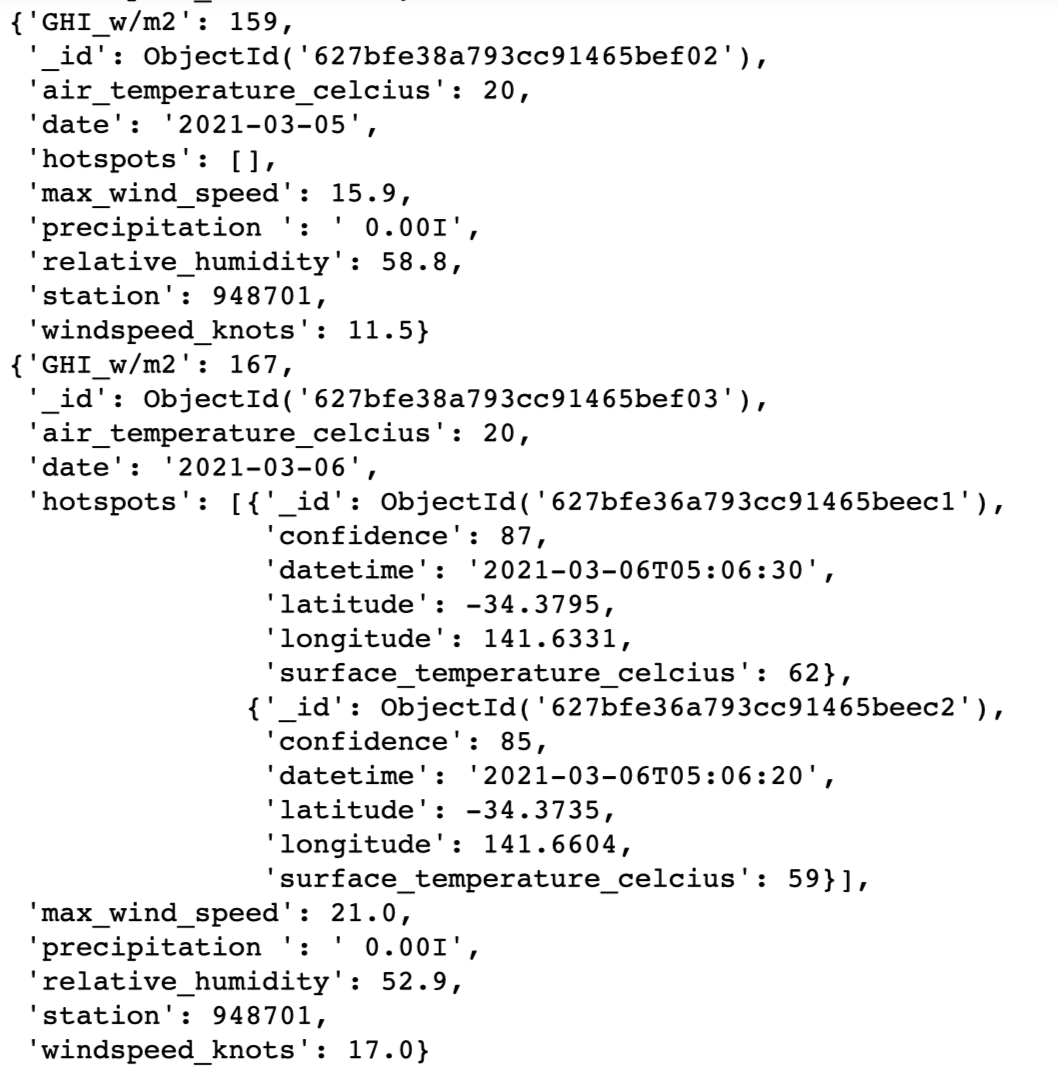

This is example is taken from the above Embedding Data Model

#### Justification
Here I use Embedded model because they are time saving and clean way to store the datas, not only that but they are easily accessed as there is a relationship between them. It is more efficient when we want to read and use the majority of the data. As it will present it directly unlike referencing where it needs time to access the stored data However it would be less efficient when it comes to storing large amount of data. It would take up alot of time to serialize/deserialize the entire document each time.

## Task 2 Querying MongoDB using PyMongo

### Part 1

#### Making a Connection with MongoDB
Let's make a connection to mongod. We can use one of the following three ways to make such a connection:

In [1]:
import pymongo
from pymongo import MongoClient

# Method 1: connect on the default host and port
client = MongoClient () # method 1: connect on the default host and port

#### Getting a Database 
A single instance of MongoDB, the variable `client`, can manage multiple databases. When we access a database, use the following syntax:

In [2]:
db = client.fit3182_assignment_db # assume that we use the database fit3182_db that we created in the previous tutorials.
#db = client['fit3182_db'] # another way of getting a database

#### Getting a Collection
Now we can access a collection via the following way:

In [3]:
# Bound the collection to a variable
Hotspot = db.HOTSPOT_HISTORIC 
Climate = db.CLIMATE_HISTORIC
Embedded = db.EMBEDDED

In [4]:
# Delete previous data before inserting it
Embedded.drop()
Hotspot.drop()
Climate.drop()

In [5]:
import pandas as pd
from datetime import date
from pprint import pprint
import itertools

In [6]:
# Dataset given
HotSpot = pd.read_csv('hotspot_historic.csv')
CliMate = pd.read_csv('climate_historic.csv')

In [7]:
HotSpot

,latitude,longitude,datetime,confidence,date,surface_temperature_celcius
0,-37.9660,145.0510,2021-12-27T04:16:51,78,27/12/2021,68
1,-35.5410,143.3110,2021-12-27T00:02:15,82,27/12/2021,63
2,-35.5540,143.3070,2021-12-27T00:02:15,67,27/12/2021,53
3,-35.5430,143.3160,2021-12-27T00:02:14,86,27/12/2021,67
4,-37.7080,145.1000,2021-12-25T04:29:08,80,25/12/2021,54
...,...,...,...,...,...,...
2663,-37.7885,141.9352,2021-03-08T04:51:00,68,8/03/2021,55
2664,-38.1031,142.4797,2021-03-08T00:30:30,75,8/03/2021,48
2665,-37.7752,141.9086,2021-03-07T04:16:10,88,7/03/2021,64
2666,-34.3795,141.6331,2021-03-06T05:06:30,87,6/03/2021,62


In [8]:
CliMate

,station,date,air_temperature_celcius,relative_humidity,windspeed_knots,max_wind_speed,precipitation,GHI_w/m2
0,948700,31/12/20,19,56.8,7.9,11.1,0.00I,154
1,948700,2/1/21,15,50.7,9.2,13.0,0.02G,128
2,948700,3/1/21,16,53.6,8.1,15.0,0.00G,133
3,948700,4/1/21,24,61.6,7.7,14.0,0.00I,186
4,948700,5/1/21,24,62.3,7.0,13.0,0.00I,185
...,...,...,...,...,...,...,...,...
361,948702,28/12/21,21,61.1,6.6,11.1,0.00I,163
362,948702,29/12/21,19,59.7,7.4,14.0,0.63G,150
363,948702,30/12/21,16,51.5,8.7,15.0,0.02G,135
364,948702,31/12/21,18,53.6,7.9,15.9,0.00G,150


In [9]:
# Ensures consistency between dataframe
HotSpot['date'] = pd.to_datetime(HotSpot['date'], dayfirst = True)
CliMate['date'] = pd.to_datetime(CliMate['date'], dayfirst = True)

In [10]:
HotSpot

,latitude,longitude,datetime,confidence,date,surface_temperature_celcius
0,-37.9660,145.0510,2021-12-27T04:16:51,78,2021-12-27,68
1,-35.5410,143.3110,2021-12-27T00:02:15,82,2021-12-27,63
2,-35.5540,143.3070,2021-12-27T00:02:15,67,2021-12-27,53
3,-35.5430,143.3160,2021-12-27T00:02:14,86,2021-12-27,67
4,-37.7080,145.1000,2021-12-25T04:29:08,80,2021-12-25,54
...,...,...,...,...,...,...
2663,-37.7885,141.9352,2021-03-08T04:51:00,68,2021-03-08,55
2664,-38.1031,142.4797,2021-03-08T00:30:30,75,2021-03-08,48
2665,-37.7752,141.9086,2021-03-07T04:16:10,88,2021-03-07,64
2666,-34.3795,141.6331,2021-03-06T05:06:30,87,2021-03-06,62


In [11]:
# Changing the datatpye for preprocessing
CliMate.columns = CliMate.columns.str.strip()
CliMate['precipitation'] = CliMate['precipitation'].astype(str)

In [12]:
# Split the Number and Alphabets
CliMate['Precipitation'] = CliMate['precipitation'].str.replace('([A-Z]+)', '')
CliMate['Type'] = CliMate['precipitation'].str.extract('([A-Z]+)')

<ipython-input-12-2d241ce403ca>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  CliMate['Precipitation'] = CliMate['precipitation'].str.replace('([A-Z]+)', '')


In [13]:
# Change the data type and drop old column
CliMate['Precipitation'] = CliMate['Precipitation'].astype("str").astype("float")
CliMate['Type'] = CliMate['Type'].astype("str")
# Dropping old Name columns
CliMate.drop(columns =["precipitation"], inplace = True)

In [14]:
CliMate

,station,date,air_temperature_celcius,relative_humidity,windspeed_knots,max_wind_speed,GHI_w/m2,Precipitation,Type
0,948700,2020-12-31,19,56.8,7.9,11.1,154,0.00,I
1,948700,2021-01-02,15,50.7,9.2,13.0,128,0.02,G
2,948700,2021-01-03,16,53.6,8.1,15.0,133,0.00,G
3,948700,2021-01-04,24,61.6,7.7,14.0,186,0.00,I
4,948700,2021-01-05,24,62.3,7.0,13.0,185,0.00,I
...,...,...,...,...,...,...,...,...,...
361,948702,2021-12-28,21,61.1,6.6,11.1,163,0.00,I
362,948702,2021-12-29,19,59.7,7.4,14.0,150,0.63,G
363,948702,2021-12-30,16,51.5,8.7,15.0,135,0.02,G
364,948702,2021-12-31,18,53.6,7.9,15.9,150,0.00,G


In [15]:
CliMate.loc[CliMate['date'] == '2021-12-12']

,station,date,air_temperature_celcius,relative_humidity,windspeed_knots,max_wind_speed,GHI_w/m2,Precipitation,Type
345,948702,2021-12-12,19,55.3,6.2,12.0,156,0.0,I


In [16]:
HotSpot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   latitude                     2668 non-null   float64       
 1   longitude                    2668 non-null   float64       
 2   datetime                     2668 non-null   object        
 3   confidence                   2668 non-null   int64         
 4   date                         2668 non-null   datetime64[ns]
 5   surface_temperature_celcius  2668 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 125.2+ KB


In [17]:
CliMate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   station                  366 non-null    int64         
 1   date                     366 non-null    datetime64[ns]
 2   air_temperature_celcius  366 non-null    int64         
 3   relative_humidity        366 non-null    float64       
 4   windspeed_knots          366 non-null    float64       
 5   max_wind_speed           366 non-null    float64       
 6   GHI_w/m2                 366 non-null    int64         
 7   Precipitation            366 non-null    float64       
 8   Type                     366 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 25.9+ KB


In [18]:
# Change the format of date accordingly
HotSpot['date'] = HotSpot['date'].dt.strftime('%Y-%m-%d')
CliMate['date'] = CliMate['date'].dt.strftime('%Y-%m-%d')

In [19]:
HotSpot

,latitude,longitude,datetime,confidence,date,surface_temperature_celcius
0,-37.9660,145.0510,2021-12-27T04:16:51,78,2021-12-27,68
1,-35.5410,143.3110,2021-12-27T00:02:15,82,2021-12-27,63
2,-35.5540,143.3070,2021-12-27T00:02:15,67,2021-12-27,53
3,-35.5430,143.3160,2021-12-27T00:02:14,86,2021-12-27,67
4,-37.7080,145.1000,2021-12-25T04:29:08,80,2021-12-25,54
...,...,...,...,...,...,...
2663,-37.7885,141.9352,2021-03-08T04:51:00,68,2021-03-08,55
2664,-38.1031,142.4797,2021-03-08T00:30:30,75,2021-03-08,48
2665,-37.7752,141.9086,2021-03-07T04:16:10,88,2021-03-07,64
2666,-34.3795,141.6331,2021-03-06T05:06:30,87,2021-03-06,62


In [20]:
HotSpot.loc[HotSpot['date'] == '2021-12-12']

,latitude,longitude,datetime,confidence,date,surface_temperature_celcius
28,-37.903,145.25,2021-12-12T00:45:38,53,2021-12-12,44


In [21]:
# Insert from df into collection of mongo
Hotspot.insert_many(HotSpot.apply(lambda x: x.to_dict(), axis=1).to_list())

In [22]:
# Loop to check if data exists in the collection
cursor = Hotspot.find({})
for document in cursor: 
    pprint(document)

{'_id': ObjectId('628ac5cdf8b13d75e1411668'),
 'confidence': 78,
 'date': '2021-12-27',
 'datetime': '2021-12-27T04:16:51',
 'latitude': -37.966,
 'longitude': 145.051,
 'surface_temperature_celcius': 68}
{'_id': ObjectId('628ac5cdf8b13d75e1411669'),
 'confidence': 82,
 'date': '2021-12-27',
 'datetime': '2021-12-27T00:02:15',
 'latitude': -35.541,
 'longitude': 143.311,
 'surface_temperature_celcius': 63}
{'_id': ObjectId('628ac5cdf8b13d75e141166a'),
 'confidence': 67,
 'date': '2021-12-27',
 'datetime': '2021-12-27T00:02:15',
 'latitude': -35.554,
 'longitude': 143.307,
 'surface_temperature_celcius': 53}
{'_id': ObjectId('628ac5cdf8b13d75e141166b'),
 'confidence': 86,
 'date': '2021-12-27',
 'datetime': '2021-12-27T00:02:14',
 'latitude': -35.543,
 'longitude': 143.316,
 'surface_temperature_celcius': 67}
{'_id': ObjectId('628ac5cdf8b13d75e141166c'),
 'confidence': 80,
 'date': '2021-12-25',
 'datetime': '2021-12-25T04:29:08',
 'latitude': -37.708,
 'longitude': 145.1,
 'surface_tem

In [23]:
# Insert from df into collection of mongo
Climate.insert_many(CliMate.apply(lambda x: x.to_dict(), axis=1).to_list())

In [24]:
# Loop to check if data exists in the collection
cursor = Climate.find({})
for document in cursor: 
    pprint(document)

{'GHI_w/m2': 154,
 'Precipitation': 0.0,
 'Type': 'I',
 '_id': ObjectId('628ac5d0f8b13d75e14120d4'),
 'air_temperature_celcius': 19,
 'date': '2020-12-31',
 'max_wind_speed': 11.1,
 'relative_humidity': 56.8,
 'station': 948700,
 'windspeed_knots': 7.9}
{'GHI_w/m2': 128,
 'Precipitation': 0.02,
 'Type': 'G',
 '_id': ObjectId('628ac5d0f8b13d75e14120d5'),
 'air_temperature_celcius': 15,
 'date': '2021-01-02',
 'max_wind_speed': 13.0,
 'relative_humidity': 50.7,
 'station': 948700,
 'windspeed_knots': 9.2}
{'GHI_w/m2': 133,
 'Precipitation': 0.0,
 'Type': 'G',
 '_id': ObjectId('628ac5d0f8b13d75e14120d6'),
 'air_temperature_celcius': 16,
 'date': '2021-01-03',
 'max_wind_speed': 15.0,
 'relative_humidity': 53.6,
 'station': 948700,
 'windspeed_knots': 8.1}
{'GHI_w/m2': 186,
 'Precipitation': 0.0,
 'Type': 'I',
 '_id': ObjectId('628ac5d0f8b13d75e14120d7'),
 'air_temperature_celcius': 24,
 'date': '2021-01-04',
 'max_wind_speed': 14.0,
 'relative_humidity': 61.6,
 'station': 948700,
 'windsp

#### Embedded Model

In [25]:
cursor = Climate.find({})
# Use Outer for loop to find specific date of the climate collection
for document in cursor:
    clim_d = document.get("date") # gets the specific date
    hot_c_d = Climate.find_one({"date":clim_d}) # Find the document allocated to the date
    hot_c_d["hotspots"] = [] # Create empty array to store Hotspot
    hotspots = Hotspot.find({"date":clim_d}, {"date":0}) # Find the collection that is on the allocated date
    # Use inner for loop to embed on the climate collection from the hotspot collection
    for d in hotspots:
        hot_c_d["hotspots"].append(d) # Push the data from hotspot into climate
    Embedded.insert_one(hot_c_d) # Insert into new collection

In [26]:
# Loop to check if data exists in the collection
emb = Embedded.find({})
for document in emb: 
    pprint(document)

{'GHI_w/m2': 154,
 'Precipitation': 0.0,
 'Type': 'I',
 '_id': ObjectId('628ac5d0f8b13d75e14120d4'),
 'air_temperature_celcius': 19,
 'date': '2020-12-31',
 'hotspots': [],
 'max_wind_speed': 11.1,
 'relative_humidity': 56.8,
 'station': 948700,
 'windspeed_knots': 7.9}
{'GHI_w/m2': 128,
 'Precipitation': 0.02,
 'Type': 'G',
 '_id': ObjectId('628ac5d0f8b13d75e14120d5'),
 'air_temperature_celcius': 15,
 'date': '2021-01-02',
 'hotspots': [],
 'max_wind_speed': 13.0,
 'relative_humidity': 50.7,
 'station': 948700,
 'windspeed_knots': 9.2}
{'GHI_w/m2': 133,
 'Precipitation': 0.0,
 'Type': 'G',
 '_id': ObjectId('628ac5d0f8b13d75e14120d6'),
 'air_temperature_celcius': 16,
 'date': '2021-01-03',
 'hotspots': [],
 'max_wind_speed': 15.0,
 'relative_humidity': 53.6,
 'station': 948700,
 'windspeed_knots': 8.1}
{'GHI_w/m2': 186,
 'Precipitation': 0.0,
 'Type': 'I',
 '_id': ObjectId('628ac5d0f8b13d75e14120d7'),
 'air_temperature_celcius': 24,
 'date': '2021-01-04',
 'hotspots': [],
 'max_wind_sp

### Part 2

a.) Find climate data on 12th December 2021.

In [27]:
# Find the data for 12-12-2021
Data_Dec = Embedded.find_one({"date":'2021-12-12'}) 
# Here i use find_one because only one document about 12th December 2021 is found in the Climate df
pprint(Data_Dec)

{'GHI_w/m2': 156,
 'Precipitation': 0.0,
 'Type': 'I',
 '_id': ObjectId('628ac5d0f8b13d75e141222d'),
 'air_temperature_celcius': 19,
 'date': '2021-12-12',
 'hotspots': [{'_id': ObjectId('628ac5cdf8b13d75e1411684'),
               'confidence': 53,
               'datetime': '2021-12-12T00:45:38',
               'latitude': -37.903,
               'longitude': 145.25,
               'surface_temperature_celcius': 44}],
 'max_wind_speed': 12.0,
 'relative_humidity': 55.3,
 'station': 948702,
 'windspeed_knots': 6.2}


b.) Find the latitude, longitude, surface temperature (°C), and confidence when the surface temperature (°C) was between 65 °C and 100 °C.

In [28]:
# Find the document that have the surface temperature (°C) was between 65 °C and 100 °C.
Surface_Temp = Embedded.aggregate([
    { "$unwind" : "$hotspots"},
    { "$unwind" : "$hotspots.surface_temperature_celcius"},
    { "$match" : { "hotspots.surface_temperature_celcius" : {"$gte":65, "$lte":100} } },
    { "$project" : {"hotspots.latitude":1, "hotspots.longitude":1, "hotspots.surface_temperature_celcius":1, "hotspots.confidence":1}}
])
for data in Surface_Temp:
    pprint(data)   


{'_id': ObjectId('628ac5d0f8b13d75e1412118'),
 'hotspots': {'confidence': 94,
              'latitude': -37.2284,
              'longitude': 147.9187,
              'surface_temperature_celcius': 73}}
{'_id': ObjectId('628ac5d0f8b13d75e1412118'),
 'hotspots': {'confidence': 97,
              'latitude': -37.6572,
              'longitude': 142.0703,
              'surface_temperature_celcius': 80}}
{'_id': ObjectId('628ac5d0f8b13d75e141211a'),
 'hotspots': {'confidence': 84,
              'latitude': -37.0193,
              'longitude': 148.1459,
              'surface_temperature_celcius': 71}}
{'_id': ObjectId('628ac5d0f8b13d75e141211a'),
 'hotspots': {'confidence': 100,
              'latitude': -37.4229,
              'longitude': 147.027,
              'surface_temperature_celcius': 99}}
{'_id': ObjectId('628ac5d0f8b13d75e141211a'),
 'hotspots': {'confidence': 80,
              'latitude': -37.0055,
              'longitude': 148.1582,
              'surface_temperature_celcius': 

c.) Find date, surface temperature (°C), air temperature (°C), relative humidity and max wind speed on 15th and 16th of December 2021.

In [29]:
# Find the document for the dates 15th and 16th of December 2021.
Find_D = Embedded.find({"date": { "$in":['2021-12-15', '2021-12-16']}},
                       {"date":1,"air_temperature_celcius":1,"hotspots.surface_temperature_celcius":1, 
                        "max_wind_speed":1, "relative_humidity":1})
for data in Find_D:
    pprint(data)

{'_id': ObjectId('628ac5d0f8b13d75e1412230'),
 'air_temperature_celcius': 18,
 'date': '2021-12-15',
 'hotspots': [{'surface_temperature_celcius': 42},
              {'surface_temperature_celcius': 36},
              {'surface_temperature_celcius': 38},
              {'surface_temperature_celcius': 40}],
 'max_wind_speed': 14.0,
 'relative_humidity': 52.0}
{'_id': ObjectId('628ac5d0f8b13d75e1412231'),
 'air_temperature_celcius': 18,
 'date': '2021-12-16',
 'hotspots': [{'surface_temperature_celcius': 43},
              {'surface_temperature_celcius': 33},
              {'surface_temperature_celcius': 54},
              {'surface_temperature_celcius': 73},
              {'surface_temperature_celcius': 55},
              {'surface_temperature_celcius': 75},
              {'surface_temperature_celcius': 55},
              {'surface_temperature_celcius': 66},
              {'surface_temperature_celcius': 56},
              {'surface_temperature_celcius': 60},
              {'surface_temper

d.) Find datetime, air temperature (°C), surface temperature (°C) and confidence when the confidence is between 80 and 100.

In [30]:
# Find the documents that confidence are  between 80 and 100.
Confidence = Embedded.aggregate([
    { "$unwind" : "$hotspots"},
    { "$unwind" : "$hotspots.confidence"},
    { "$match" : { "hotspots.confidence" : {"$gte":80, "$lte":100} } },
    { "$project" : {"hotspots.datetime":1, "air_temperature_celcius":1,
                    "hotspots.surface_temperature_celcius":1, "hotspots.confidence":1}}
])
for data in Confidence:
    pprint(data)   

{'_id': ObjectId('628ac5d0f8b13d75e1412114'),
 'air_temperature_celcius': 20,
 'hotspots': {'confidence': 87,
              'datetime': '2021-03-06T05:06:30',
              'surface_temperature_celcius': 62}}
{'_id': ObjectId('628ac5d0f8b13d75e1412114'),
 'air_temperature_celcius': 20,
 'hotspots': {'confidence': 85,
              'datetime': '2021-03-06T05:06:20',
              'surface_temperature_celcius': 59}}
{'_id': ObjectId('628ac5d0f8b13d75e1412115'),
 'air_temperature_celcius': 19,
 'hotspots': {'confidence': 88,
              'datetime': '2021-03-07T04:16:10',
              'surface_temperature_celcius': 64}}
{'_id': ObjectId('628ac5d0f8b13d75e1412117'),
 'air_temperature_celcius': 23,
 'hotspots': {'confidence': 86,
              'datetime': '2021-03-09T13:23:40',
              'surface_temperature_celcius': 41}}
{'_id': ObjectId('628ac5d0f8b13d75e1412118'),
 'air_temperature_celcius': 19,
 'hotspots': {'confidence': 100,
              'datetime': '2021-03-10T04:48:40',
    

e.) Find the top 10 records with the highest surface temperature (°C).

In [31]:
# Find the top 10 highest surface temperature (°C).
Surface_T = Embedded.aggregate([
    { "$unwind" : "$hotspots"},
    { "$unwind" : "$hotspots.surface_temperature_celcius"},
    { "$sort" : {"hotspots.surface_temperature_celcius":-1}},
    { "$limit": 10 }
])
for data in Surface_T:
    pprint(data)   

{'GHI_w/m2': 122,
 'Precipitation': 0.0,
 'Type': 'I',
 '_id': ObjectId('628ac5d0f8b13d75e141213f'),
 'air_temperature_celcius': 15,
 'date': '2021-04-18',
 'hotspots': {'_id': ObjectId('628ac5cdf8b13d75e1411b0b'),
              'confidence': 100,
              'datetime': '2021-04-18T04:52:00',
              'latitude': -38.1665,
              'longitude': 143.062,
              'surface_temperature_celcius': 124},
 'max_wind_speed': 9.9,
 'relative_humidity': 56.1,
 'station': 948701,
 'windspeed_knots': 5.1}
{'GHI_w/m2': 140,
 'Precipitation': 0.0,
 'Type': 'I',
 '_id': ObjectId('628ac5d0f8b13d75e1412131'),
 'air_temperature_celcius': 16,
 'date': '2021-04-04',
 'hotspots': {'_id': ObjectId('628ac5cdf8b13d75e1411fb5'),
              'confidence': 100,
              'datetime': '2021-04-04T04:32:50',
              'latitude': -36.343,
              'longitude': 142.1986,
              'surface_temperature_celcius': 123},
 'max_wind_speed': 12.0,
 'relative_humidity': 47.5,
 'station'

f.) Find the number of fires each day. You are required to only display the total number of fires and the date in the output.

In [32]:
# Find the days that have and don't have fire
Fire_each = Embedded.aggregate([
    { "$project" : {"date":1, 
                    "hotspots":
                     { "$switch": 
                      {
                        "branches": 
                          [
                          { "case": { "$ne": ["$hotspots", [] ] }, "then": 0 }
                          ],
                        "default": "No Fire"
                      }
                     }
                   }
    }
])
for data in Fire_each:
    pprint(data)   

{'_id': ObjectId('628ac5d0f8b13d75e14120d4'),
 'date': '2020-12-31',
 'hotspots': 'No Fire'}
{'_id': ObjectId('628ac5d0f8b13d75e14120d5'),
 'date': '2021-01-02',
 'hotspots': 'No Fire'}
{'_id': ObjectId('628ac5d0f8b13d75e14120d6'),
 'date': '2021-01-03',
 'hotspots': 'No Fire'}
{'_id': ObjectId('628ac5d0f8b13d75e14120d7'),
 'date': '2021-01-04',
 'hotspots': 'No Fire'}
{'_id': ObjectId('628ac5d0f8b13d75e14120d8'),
 'date': '2021-01-05',
 'hotspots': 'No Fire'}
{'_id': ObjectId('628ac5d0f8b13d75e14120d9'),
 'date': '2021-01-06',
 'hotspots': 'No Fire'}
{'_id': ObjectId('628ac5d0f8b13d75e14120da'),
 'date': '2021-01-07',
 'hotspots': 'No Fire'}
{'_id': ObjectId('628ac5d0f8b13d75e14120db'),
 'date': '2021-01-08',
 'hotspots': 'No Fire'}
{'_id': ObjectId('628ac5d0f8b13d75e14120dc'),
 'date': '2021-01-09',
 'hotspots': 'No Fire'}
{'_id': ObjectId('628ac5d0f8b13d75e14120dd'),
 'date': '2021-01-10',
 'hotspots': 'No Fire'}
{'_id': ObjectId('628ac5d0f8b13d75e14120de'),
 'date': '2021-01-11',
 

g.) Find the records of fires where the confidence is below 70.

In [33]:
# Find the fire with confidenc < 70
Fire = Embedded.aggregate([
    { "$unwind" : "$hotspots"},
    { "$unwind" : "$hotspots.confidence"},
    { "$match" : { "hotspots.confidence" : {"$lt":70} } }
])
for data in Fire:
    pprint(data)   

{'GHI_w/m2': 177,
 'Precipitation': 0.0,
 'Type': 'I',
 '_id': ObjectId('628ac5d0f8b13d75e1412116'),
 'air_temperature_celcius': 21,
 'date': '2021-03-08',
 'hotspots': {'_id': ObjectId('628ac5cdf8b13d75e14120cf'),
              'confidence': 68,
              'datetime': '2021-03-08T04:51:00',
              'latitude': -37.7885,
              'longitude': 141.9352,
              'surface_temperature_celcius': 55},
 'max_wind_speed': 13.0,
 'relative_humidity': 51.7,
 'station': 948701,
 'windspeed_knots': 7.2}
{'GHI_w/m2': 192,
 'Precipitation': 0.0,
 'Type': 'I',
 '_id': ObjectId('628ac5d0f8b13d75e1412117'),
 'air_temperature_celcius': 23,
 'date': '2021-03-09',
 'hotspots': {'_id': ObjectId('628ac5cdf8b13d75e14120cd'),
              'confidence': 54,
              'datetime': '2021-03-09T03:57:00',
              'latitude': -37.7171,
              'longitude': 147.5866,
              'surface_temperature_celcius': 44},
 'max_wind_speed': 11.1,
 'relative_humidity': 53.4,
 'station':

h.) Find the average surface temperature (°C) for each day. You are required to only display average surface temperature (°C) and the date in the output.

In [34]:
# Find the average surface temperature if there is hotspots
AVG = Embedded.aggregate([
    { "$project" : {"date":1,
                    "hotspots":
                     { "$switch": 
                      {
                        "branches": 
                          [
                          { "case": { "$ne": ["$hotspots", [] ] }, "then": {"$avg":"$hotspots.surface_temperature_celcius"} }
                          ],
                        "default": None
                      }
                     }
                   }
    }    
])
for data in AVG:
    pprint(data)

{'_id': ObjectId('628ac5d0f8b13d75e14120d4'),
 'date': '2020-12-31',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d75e14120d5'),
 'date': '2021-01-02',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d75e14120d6'),
 'date': '2021-01-03',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d75e14120d7'),
 'date': '2021-01-04',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d75e14120d8'),
 'date': '2021-01-05',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d75e14120d9'),
 'date': '2021-01-06',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d75e14120da'),
 'date': '2021-01-07',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d75e14120db'),
 'date': '2021-01-08',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d75e14120dc'),
 'date': '2021-01-09',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d75e14120dd'),
 'date': '2021-01-10',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d75e14120de'),
 'date': '2021-01-11',
 'hotspots': None}
{'_id': ObjectId('628ac5d0f8b13d

i.) Find the top 10 records with the lowest GHI.

In [35]:
# Find the top 10 records with the lowest GHI
GHI = Embedded.aggregate([
    { "$sort" : {"GHI_w/m2":1}},
    { "$limit": 10 }
])
for data in GHI:
    pprint(data)   

{'GHI_w/m2': 47,
 'Precipitation': 0.0,
 'Type': 'I',
 '_id': ObjectId('628ac5d0f8b13d75e14121a9'),
 'air_temperature_celcius': 5,
 'date': '2021-08-02',
 'hotspots': [{'_id': ObjectId('628ac5cdf8b13d75e141178a'),
               'confidence': 94,
               'datetime': '2021-08-02T03:45:40',
               'latitude': -37.4796,
               'longitude': 141.9403,
               'surface_temperature_celcius': 87},
              {'_id': ObjectId('628ac5cdf8b13d75e141178b'),
               'confidence': 54,
               'datetime': '2021-08-02T03:45:00',
               'latitude': -37.491,
               'longitude': 141.936,
               'surface_temperature_celcius': 40}],
 'max_wind_speed': 5.1,
 'relative_humidity': 38.6,
 'station': 948701,
 'windspeed_knots': 1.8}
{'GHI_w/m2': 48,
 'Precipitation': 0.0,
 'Type': 'A',
 '_id': ObjectId('628ac5d0f8b13d75e1412188'),
 'air_temperature_celcius': 5,
 'date': '2021-06-30',
 'hotspots': [{'_id': ObjectId('628ac5cdf8b13d75e14117a5')

j.) Find the records with a 24-hour precipitation recorded between 0.20 to 0.35.

In [36]:
# Find the document that have a 24-hour record(G), and the range is between 0.20 and 0.35
Precipitation = Embedded.aggregate([
    { "$unwind" : "$Precipitation"},
    { "$match" : { "Type" : "G", "Precipitation": {"$gte":0.20, "$lte":0.35}}}
])
Precipitation
for data in Precipitation:
    pprint(data)

{'GHI_w/m2': 157,
 'Precipitation': 0.31,
 'Type': 'G',
 '_id': ObjectId('628ac5d0f8b13d75e14120e0'),
 'air_temperature_celcius': 19,
 'date': '2021-01-13',
 'hotspots': [],
 'max_wind_speed': 18.1,
 'relative_humidity': 54.1,
 'station': 948700,
 'windspeed_knots': 11.2}
{'GHI_w/m2': 146,
 'Precipitation': 0.24,
 'Type': 'G',
 '_id': ObjectId('628ac5d0f8b13d75e141212b'),
 'air_temperature_celcius': 17,
 'date': '2021-03-29',
 'hotspots': [{'_id': ObjectId('628ac5cdf8b13d75e1412037'),
               'confidence': 69,
               'datetime': '2021-03-29T00:48:40',
               'latitude': -34.2648,
               'longitude': 141.6325,
               'surface_temperature_celcius': 51}],
 'max_wind_speed': 21.0,
 'relative_humidity': 49.9,
 'station': 948701,
 'windspeed_knots': 12.2}
{'GHI_w/m2': 166,
 'Precipitation': 0.31,
 'Type': 'G',
 '_id': ObjectId('628ac5d0f8b13d75e1412141'),
 'air_temperature_celcius': 20,
 'date': '2021-04-20',
 'hotspots': [{'_id': ObjectId('628ac5cdf8b1